In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import tensorflow as tf
import seaborn as sns

# setting up plot sizes
mpl.rcParams["figure.figsize"] = (12, 8)
mpl.rcParams["axes.grid"] = False

warnings.filterwarnings("ignore")

In [62]:
emissions = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv", skiprows=3)
country = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\GlobalLandTemperaturesByCountry.csv")

# processing the temperature dataset to only show Indonesia
country["dt"] = pd.to_datetime(country["dt"])
country.set_index("dt", inplace=True)
indo_temp = country.loc[country["Country"] == "Indonesia"] 
indo_temp.fillna(method="bfill", inplace=True)
indo_temp.drop("AverageTemperatureUncertainty", axis=1, inplace=True)
indo_temp = indo_temp.resample("AS").mean()
indo_temp 

# processing the CO2 emissions dataset to only show Indonesia
indo_emissions = emissions.loc[emissions["Country Name"] == "Indonesia"]
indo_emissions.drop("Unnamed: 65", axis=1, inplace=True)
# dropping the NaN values as it doesn't affect the analysis
indo_emissions.drop(["2019", "2020"], axis=1, inplace=True)

# slicing the dataframe to get usable features
indo_emissions = indo_emissions.iloc[:, 4:]
indo_emissions = indo_emissions.transpose()
indo_emissions.rename(columns={106:"CO2 emissions (metric tons per capita)"}, inplace=True)
indo_emissions.index = pd.to_datetime(indo_emissions.index)
 
# combining the two datasets together
# drop rows that don't have both features
indo_final = indo_temp.merge(indo_emissions, how='inner', left_on=indo_temp.index, right_on=indo_emissions.index)

# changing the datetime column name
indo_final.rename(columns={"key_0":"datetime"}, inplace=True)
indo_final

# setting the date to be the index
indo_final.set_index("datetime", inplace=True)
indo_final

,AverageTemperature,CO2 emissions (metric tons per capita)
datetime,,
1960-01-01,26.029167,0.243920
1961-01-01,25.771667,0.288848
1962-01-01,25.789417,0.248553
1963-01-01,25.838583,0.239783
1964-01-01,25.835500,0.229458
1965-01-01,25.701750,0.246241
1966-01-01,25.943917,0.227084
1967-01-01,25.835083,0.232007
1968-01-01,25.951083,0.253602


In [67]:
# splitting the dataset into training and testing
# using a 75:15:10 ratio for the split
n = len(indo_final)
train, validation, test = indo_final[:int(n*0.75)], indo_final[int(n*0.75):int(n*0.9)], indo_final[int(n*0.9):]

num_features = indo_final.shape[1]
num_features

2

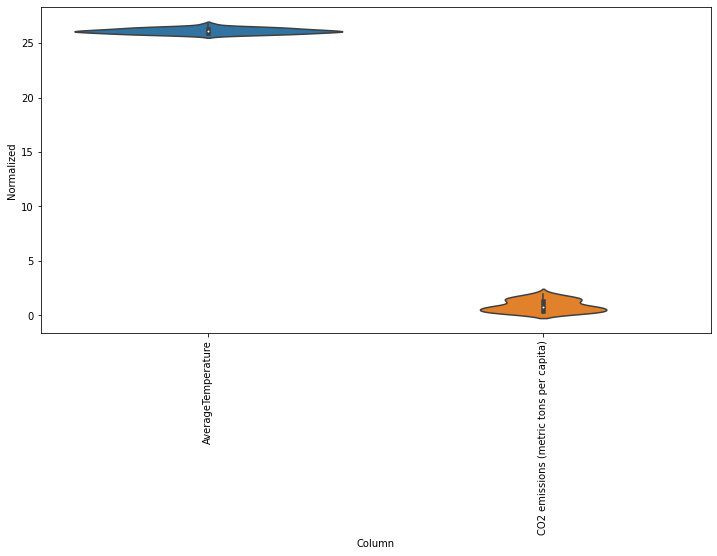

In [76]:
# normalizing the data
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
validation = (validation - train_mean) / train_std
test = (test - train_mean) / train_std

indo_final_std = (indo_final - train_mean) / train_std
indo_final_std = indo_final_std.melt(var_name="Column", value_name="Normalized")
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=indo_final_std)
_ = ax.set_xticklabels(indo_final.keys(), rotation=90)